In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def find_color(img):
	"""
	Implement the cone detection using color segmentation algorithm
	Input:
		img: np.3darray; the input image with a cone to be detected. BGR.
		template_file_path; Not required, but can optionally be used to automate setting hue filter values.
	Return:
		bbox: ((x1, y1), (x2, y2)); the bounding box of the cone, unit in px
				(x1, y1) is the top left of the bbox and (x2, y2) is the bottom right of the bbox
	"""
	########## YOUR CODE STARTS HERE ##########
	#ORANGE_THRESHOLD = ([5,50,50], [15,255,255])
	# 
	# 
	# 
	#   #HSV (Hue, Saturation, Value)   For Orange color
	ORANGE_THRESHOLD = ([15,100,20], [25,255,255])
	bounding_box = ((0,0),(0,0))
	

	frame = img
	# Taking a matrix of size 5 as the kernel
	kernel = np.ones((5,5), np.uint8)

	# The first parameter is the original image,
	# kernel is the matrix with which image is
	# convolved and third parameter is the number
	# of iterations, which will determine how much
	# you want to erode/dilate a given image.
	img_erosion = cv2.erode(frame, kernel, iterations=1)
	img_dilation = cv2.dilate(img_erosion, kernel, iterations=2)
	# image_print(frame)
    # image_print(img_erosion)
	# image_print(img_dilation)

	frame = img_dilation
	
	# image_print([])
	# Taking a matrix of size 5 as the kernel


	#Convert BGR to HSV
	hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)



	#OpenCV needs bounds as numpy arrays
	lower_bound = np.array(ORANGE_THRESHOLD[0])
	upper_bound = np.array(ORANGE_THRESHOLD[1])



	mask = cv2.inRange(hsv,lower_bound,upper_bound)
	return mask

In [41]:
import glob
image_list = []
seg_list = []
for filename in glob.glob('./color_data/*'):
    img = cv2.imread(filename, cv2.IMREAD_COLOR)
    image_list.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    seg_list.append(find_color(cv2.cvtColor(image_list[-1], cv2.COLOR_RGB2HSV)))

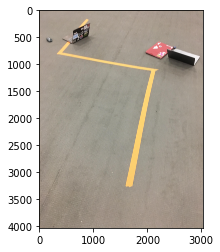

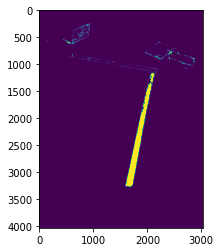

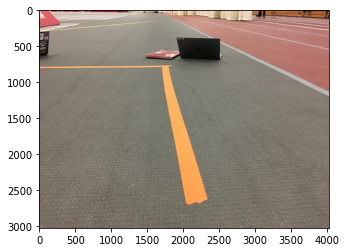

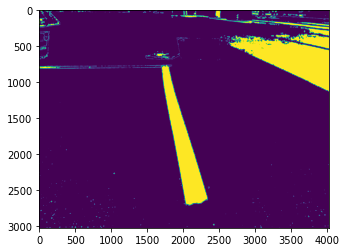

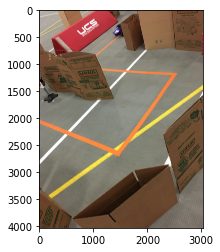

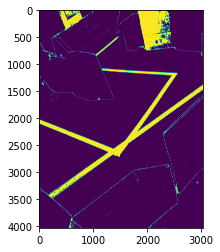

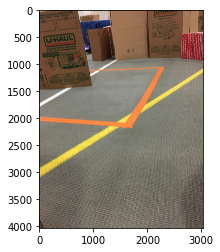

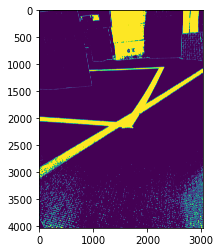

In [42]:
for img,img2 in zip(image_list,seg_list):
    plt.figure()
    plt.imshow(img)
    plt.figure()
    plt.imshow(img2)
    # print(np.unique(img))